# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# 코드 추가(HW01에 제공되었던 코드)
# 이 노트북 파일이 저장되어 있는 디렉토리 위치까지 옮기기
# %cd /content/drive/MyDrive/Colab Notebooks

## 데이터 불러오기

In [4]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm, trange

In [5]:
df = pd.read_csv('airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


In [7]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,27,1,2,183,4,4,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,1,0,22,1,0,829,2,3,3,2,...,1,1,3,3,3,3,1,4,4.0,0
2,0,0,23,1,2,1020,4,5,4,1,...,4,3,4,5,3,5,4,0,0.0,1
3,1,0,21,1,0,1028,4,4,4,5,...,3,3,3,2,5,4,3,0,0.0,1
4,1,1,67,0,0,626,3,4,3,3,...,2,2,3,2,5,2,3,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,1,2,2323,2,2,2,2,...,4,3,5,4,5,4,4,0,0.0,1
996,0,1,50,1,0,109,4,1,1,1,...,4,2,4,1,5,4,4,0,0.0,1
997,1,1,57,0,1,431,4,5,4,4,...,1,1,4,1,3,1,5,0,0.0,0
998,0,1,29,1,2,2029,2,2,2,2,...,4,4,5,4,5,5,4,53,50.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             1000 non-null   int64  
 1   Customer Type                      1000 non-null   int64  
 2   Age                                1000 non-null   int64  
 3   Type of Travel                     1000 non-null   int64  
 4   Class                              1000 non-null   int64  
 5   Flight Distance                    1000 non-null   int64  
 6   Inflight wifi service              1000 non-null   int64  
 7   Departure/Arrival time convenient  1000 non-null   int64  
 8   Ease of Online booking             1000 non-null   int64  
 9   Gate location                      1000 non-null   int64  
 10  Food and drink                     1000 non-null   int64  
 11  Online boarding                    1000 non-null   int64 

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state = 20)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 22)
y_train's shape :  (800,)

X_val's shape :  (100, 22)
y_val's shape :  (100,)

X_test's shape :  (100, 22)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import parallel_coordinates

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

In [11]:
df.groupby("satisfaction").size()

satisfaction
0    560
1    440
dtype: int64

In [12]:
# sns.pairplot(df, hue="satisfaction")
# plt.show()

In [13]:
### 문제 1 ###
### 코드 작성 ###

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state = 20)

# Standard Scaler
ss = StandardScaler() # Scaling
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_s = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)
X_train_s.head()

# Minmax Scaler
ms = MinMaxScaler()
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns = X_train.columns)
X_test_m = pd.DataFrame(ms.transform(X_test), columns = X_test.columns)
X_train_m.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,1.0,0.726027,0.0,0.0,0.012470,0.8,0.6,0.8,1.00,...,0.25,0.0,0.0,0.8,0.00,0.25,0.00,1.0,0.000000,0.00
1,1.0,1.0,0.657534,0.0,0.0,0.040288,0.8,0.8,0.8,0.50,...,0.75,1.0,1.0,0.8,1.00,1.00,1.00,1.0,0.000000,0.00
2,0.0,0.0,0.410959,1.0,0.0,0.133094,0.6,0.8,0.6,0.50,...,0.50,0.5,0.5,1.0,0.50,0.00,0.50,0.5,0.000000,0.00
3,1.0,0.0,0.246575,1.0,0.0,0.129257,0.2,0.8,0.2,0.50,...,0.50,0.0,1.0,0.6,0.75,0.50,0.25,0.5,0.263587,0.46
4,1.0,1.0,0.794521,0.0,0.5,0.225659,0.6,0.4,0.6,0.75,...,0.50,1.0,1.0,0.6,0.50,0.25,1.00,0.0,0.000000,0.00


In [14]:
X_train_s.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.997503,0.470504,1.359161,-1.466154,-1.077074,-1.078624,0.964985,-0.023211,0.912064,1.595886,...,-1.123835,-1.720159,-1.817860,0.532430,-2.149925,-1.110632,-2.184359,1.320720,-0.398658,-0.404851
1,0.997503,0.470504,1.032890,-1.466154,-1.077074,-0.959936,0.964985,0.639961,0.912064,-0.008020,...,0.402596,1.239254,1.263259,0.532430,1.152888,1.357439,1.172965,1.320720,-0.398658,-0.404851
2,-1.002503,-2.125380,-0.141683,0.682057,-1.077074,-0.563968,0.219103,0.639961,0.211150,-0.008020,...,-0.360619,-0.240452,-0.277301,1.313979,-0.498518,-1.933322,-0.505697,-0.225112,-0.398658,-0.404851
3,0.997503,-2.125380,-0.924732,0.682057,-1.077074,-0.580339,-1.272662,0.639961,-1.190677,-0.008020,...,-0.360619,-1.720159,1.263259,-0.249119,0.327185,-0.287942,-1.345028,-0.225112,2.596103,4.363325
4,0.997503,0.470504,1.685431,-1.466154,-0.033903,-0.169024,0.219103,-0.686383,0.211150,0.793933,...,-0.360619,1.239254,1.263259,-0.249119,-0.498518,-1.110632,1.172965,-1.770943,-0.398658,-0.404851


In [15]:
def print_metrics(model, X_train):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print('Cross val scores: {}'.format(scores))
    print('Mean Accuracy: {:.7f}'.format(scores.mean()))
    print('Confusion Matrix:\n', confusion_matrix(y_train, model.predict(X_train)))

In [16]:
# Simple Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print_metrics(knn, X_train)

Cross val scores: [0.625  0.6    0.6125 0.6125 0.65   0.5625 0.5875 0.625  0.5875 0.7   ]
Mean Accuracy: 0.6162500
Confusion Matrix:
 [[341 103]
 [ 99 257]]


In [17]:
# Standard Model
knn_s = KNeighborsClassifier()
knn_s.fit(X_train_s, y_train)
print_metrics(knn_s, X_train_s)

Cross val scores: [0.8625 0.9    0.825  0.9    0.8875 0.85   0.9125 0.9    0.85   0.875 ]
Mean Accuracy: 0.8762500
Confusion Matrix:
 [[420  24]
 [ 48 308]]


In [18]:
# MinMax Scaled Model
knn_m = KNeighborsClassifier()
knn_m.fit(X_train_m, y_train)
print_metrics(knn_m, X_train_m)

Cross val scores: [0.8375 0.9    0.8375 0.925  0.9125 0.8125 0.9    0.8625 0.825  0.85  ]
Mean Accuracy: 0.8662500
Confusion Matrix:
 [[425  19]
 [ 59 297]]


## Parameters 모두 고려
- n_neighbors: 검색할 이웃의 수로 default 값은 5이다.
- Metric: 거리 측정 방식을 변경하는 매개변수로 default 값은 minkowsi이다
- Weights: 예측에 사용하는 가중치로 uniform 은 각 이웃에 동일한 가중치를 , ‘distance’는 가까운 이웃이 멀리 있는 이웃보다 더욱 큰 영향을 미친다.

In [19]:
# GridSearch CV 사용
grid_params = {
    'n_neighbors' : list(range(1,120)), # 1~120
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [20]:
# 1. Simple (No Scaled)
gs = GridSearchCV(knn, grid_params)
gs.fit(X_train, y_train)
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best Score :  0.6925
Best Test Score :  0.69


In [21]:
# 2. Standard
gs_s = GridSearchCV(knn_s, grid_params)
gs_s.fit(X_train_s, y_train)
print("Best Parameters : ", gs_s.best_params_)
print("Best Score : ", gs_s.best_score_)
print("Best Test Score : ", gs_s.score(X_test_s, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Score :  0.885
Best Test Score :  0.91


In [22]:
#3. MinMaxed
gs_m = GridSearchCV(knn_m, grid_params)
gs_m.fit(X_train_m, y_train)
print("Best Parameters : ", gs_m.best_params_)
print("Best Score : ", gs_m.best_score_)
print("Best Test Score : ", gs_m.score(X_test_m, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
Best Score :  0.885
Best Test Score :  0.91


## Parameters 고정: euclidean, uniform

In [23]:
# 유클리디안
grid_params = {
    'n_neighbors' : list(range(1,120)), # 1~120
    'weights' : ["uniform"],
    'metric' : ['euclidean']
}

In [24]:
# 1. Simple (No Scaled)
gs = GridSearchCV(knn, grid_params)
gs.fit(X_train, y_train)
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 71, 'weights': 'uniform'}
Best Score :  0.66875
Best Test Score :  0.62


In [25]:
# 2. Standard
gs_s = GridSearchCV(knn_s, grid_params)
gs_s.fit(X_train_s, y_train)
print("Best Parameters : ", gs_s.best_params_)
print("Best Score : ", gs_s.best_score_)
print("Best Test Score : ", gs_s.score(X_test_s, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score :  0.87375
Best Test Score :  0.88


In [26]:
#3. MinMaxed
gs_m = GridSearchCV(knn_m, grid_params)
gs_m.fit(X_train_m, y_train)
print("Best Parameters : ", gs_m.best_params_)
print("Best Score : ", gs_m.best_score_)
print("Best Test Score : ", gs_m.score(X_test_m, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score :  0.86875
Best Test Score :  0.87


## Parameters 고정: manhattan, uniform

In [27]:
# 맨하튼
grid_params = {
    'n_neighbors' : list(range(1,120)), # 1~120
    'weights' : ["uniform"],
    'metric' : ['manhattan']
}

In [28]:
# 1. Simple (No Scaled)
gs = GridSearchCV(knn, grid_params)
gs.fit(X_train, y_train)
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Best Score :  0.6875000000000001
Best Test Score :  0.68


In [29]:
# 2. Standard
gs_s = GridSearchCV(knn_s, grid_params)
gs_s.fit(X_train_s, y_train)
print("Best Parameters : ", gs_s.best_params_)
print("Best Score : ", gs_s.best_score_)
print("Best Test Score : ", gs_s.score(X_test_s, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}
Best Score :  0.8812500000000002
Best Test Score :  0.91


In [30]:
#3. MinMaxed
gs_m = GridSearchCV(knn_m, grid_params)
gs_m.fit(X_train_m, y_train)
print("Best Parameters : ", gs_m.best_params_)
print("Best Score : ", gs_m.best_score_)
print("Best Test Score : ", gs_m.score(X_test_m, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score :  0.88125
Best Test Score :  0.91


## Final Models

In [31]:
# Best Model, HyperParameters
knn_m = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 12, weights = 'distance')
knn_m.fit(X_train_m, y_train)
print_metrics(knn_m, X_train_m)

Cross val scores: [0.875  0.8625 0.85   0.9125 0.925  0.85   0.9125 0.9125 0.875  0.8625]
Mean Accuracy: 0.8837500
Confusion Matrix:
 [[444   0]
 [  0 356]]


In [32]:
# Best Model, HyperParameters
knn_s = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 10, weights = 'distance')
knn_s.fit(X_train_s, y_train)
print_metrics(knn_s, X_train_s)

Cross val scores: [0.8875 0.8375 0.8375 0.9125 0.9375 0.8375 0.9    0.925  0.875  0.8625]
Mean Accuracy: 0.8812500
Confusion Matrix:
 [[444   0]
 [  0 356]]


In [33]:
def print_test_metrics(model, X_test):
    print('*** Test Accuracy *** \n   {}'.format(model.score(X_test, y_test)))
    print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, model.predict(X_test)))

In [34]:
print_test_metrics(knn_m, X_test_m)

*** Test Accuracy *** 
   0.91

*** Confusion Matrix *** 
 [[56  3]
 [ 6 35]]


In [35]:
print_test_metrics(knn_s, X_test_s)

*** Test Accuracy *** 
   0.91

*** Confusion Matrix *** 
 [[55  4]
 [ 5 36]]


## **설명 작성**  

- 최적의 파라미터: 
    1. Simple:
        - Parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
        - Score: 0.6925
        - Test Score: 0.69
    2. Standard Scaler: 
        - Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'} 
        - Score:  0.885
        - Test Score:  0.91
    3. MinMaxed:
        - Parameters :  {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
        - Score:  0.86875
        - Test Score:  0.87
- 설명: 


---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_test :  [0.86, 0.88, 0.92, 0.93, 0.92, 0.92]
forest_test2 : [0.87, 0.89, 0.93, 0.93, 0.93, 0.93]
최적의 파라미터(criterion=gini) 0.93
최적의 파라미터(criterion=entropy 0.93


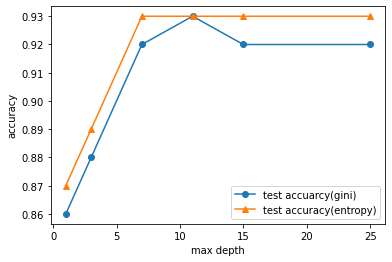

In [37]:
### 문제 2 ###
### 코드 작성 ###

# max_depth : 생성할 DecisionTree의 깊이
max_dep = [1, 3, 7, 11, 15, 25]

# training, test accuracy를 저장하기 위한 빈 리스트 생성
forest_train = []
forest_test = []

# 반복문을 통해 max_depth 값을 다르게 하여 정확도를 계산한다.
for i in max_dep:
  forest = RandomForestClassifier(n_estimators=100, random_state = 20, max_depth = i, criterion = 'gini')
  # 생성된 모델을 학습시킴
  forest.fit(X_train, y_train)

  # forest_train accuracy를 리스트에 추가
  forest_train.append(forest.score(X_train, y_train))
  # forest_test accuracy를 리스트에 추가
  forest_test.append(forest.score(X_test, y_test))

# X축은 max depth, Y축은 정확도 값을 갖는 그래프를 생성한다.
plt.figure()
# plt.plot(max_dep, forest_train, label = 'train accuarcy(gini)', marker='o')
plt.plot(max_dep, forest_test, label = 'test accuarcy(gini)', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()


# criterion에 entropy 값을 갖는 training, test accuracy를 저장하기 위한 빈 리스트 생성
forest_train2 = []
forest_test2 = []

# 반복문을 통해 max_depth 값을 다르게 하여 정확도를 계산한다.
for j in max_dep:
  forest2 = RandomForestClassifier(n_estimators=100, random_state = 20, max_depth = j, criterion = 'entropy')
  # 생성된 모델을 학습시킨다
  forest2.fit(X_train, y_train)

  # forest_train accuracy를 리스트에 추가한다.
  forest_train2.append(forest2.score(X_train, y_train))
  # forest_test accuracy를 리스트에 추가한다.
  forest_test2.append(forest2.score(X_test, y_test))

# X축은 max depth, Y축은 정확도 값을 갖는 그래프를 생성한다.
# plt.plot(max_dep, forest_train2, label = 'train accuracy(entropy)', marker='^')
plt.plot(max_dep, forest_test2, label= 'test accuracy(entropy)', marker='^')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()

print('forest_test : ', forest_test)
print('forest_test2 :', forest_test2)

# max_depth와 accuracy 리스트를 하나의 딕셔너리로 결합
forest_dict = dict(zip(forest_test, max_dep))
forest_dict2 = dict(zip(forest_test2, max_dep))

# 최적의 파라미터를 찾기 위해 정확도가 최대값인 max_depth 추출
opt_m1 = forest_dict.get(max(forest_dict))
opt_m2 = forest_dict2.get(max(forest_dict2))

# criterion='gini' 값을 갖는 최적의 파라미터 test accuracy를 계산한다.
optimal_forest = RandomForestClassifier(n_estimators = 100, random_state = 20, max_depth = opt_m1, criterion = 'gini')
optimal_forest.fit(X_train, y_train)
optimal_test = optimal_forest.score(X_test, y_test)

# criterion='entropy' 값을 갖는 최적의 파라미터 test accuracy를 계산한다.
optimal_forest2 = RandomForestClassifier(n_estimators= 100, random_state=20, max_depth=opt_m2, criterion='entropy')
optimal_forest2.fit(X_train, y_train)
optimal_test2 = optimal_forest2.score(X_test, y_test)

# 결과값 출력
print('최적의 파라미터(criterion=gini)', optimal_test)
print('최적의 파라미터(criterion=entropy', optimal_test2)

**설명 작성**  
- 최적의 파라미터: 

criterion(gini)일 때 max_depth= 11,

criterion(entropy)일 때 max_depth = 15 

- 설명: 

criterion(gini)의 map_depth 값이 11일 때, test accuracy가 0.93로 최적의 값을 나타낸다.

criterion(entropy)의 map_depth 값이 15일 때, test accuracy가 0.94로 최적의 값을 나타낸다.

(max_depth가 증가하더라도 test accuracy가 더 이상 증가하지 않는다)

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [38]:
# 3-1:k-fold 코드:


**설명 작성**  
- 최적의 파라미터:
- 설명:

In [39]:
### 문제 3-2 ###
### 코드 작성 ###
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# test data를 제외한 90%의 데이터를 사용한다는 조건에 따른 test_size 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state = 30)

# model명 loocv로 저장
loocv = LeaveOneOut()

# 파라미터 C
par_C = [0.01, 0.1, 1, 100]

# linear SVM 모델의 파라미터 C, 반복문을 통해 확인
for variableC in par_C:
  model = SVC(C= variableC).fit(X_train, y_train)
  score_train = model.score(X_train, y_train)
  score_test = model.score(X_test, y_test)
  print("linear SVM : C:{}, traing score:{:2f}, test score:{:2f} \n".format(variableC, score_train, score_test))

  # cross validation scores 측정
  cv2_score = cross_val_score(model, X_train, y_train, cv = loocv)

  # cv_score 값을 저장하기 위한 딕셔너리 생성
  cv2_dict = {}
  cv2_dict[variableC] = cv2_score


y_true, y_pred = list(), list()

for train, test in loocv.split(X):
  X_train, X_test = X.iloc[train, :], X.iloc[test, :]
  y_train, y_test = y[train], y[test]

  # fit model
  model2 = RandomForestClassifier(random_state=25)
  model2.fit(X_train, y_train)

  # evaluate model
  yhat = model.predict(X_test)

  y_true.append(y_test[0])
  y_pred.append(yhat[0])

  acc = accuracy_score(y_true, y_pred)
  print('Accuracy: %.4f'% acc)


NameError: name 'SVC' is not defined

**설명 작성**  
- 최적의 파라미터:
- 설명:

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [ ]:
print(df.head())

In [ ]:
print(df.shape) #(20640, 9)
print(df.describe())

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """

####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

In [ ]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ##################




        ##############################################
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
### 문제 4-3 ###
### 코드 작성 ###

In [ ]:
### 문제 4-3 ###
### 그래프 작성 ###

- Rridge regression 모델 최적의 alpha 값:
- Lasso regression 모델 최적의 alpha 값:

In [ ]:
# 최종 결과 출력